In [69]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
np.random.seed(0)

In [70]:
X, y = data.load_diabetes(return_X_y=True)
# X, y = data.make_regression(n_samples=1000,n_features=10,noise=10)



X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)


scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))



In [71]:
beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

print(beta_hat)

predict = X_test @ beta_hat
print(f'MSE: {mean_squared_error(y_test, predict)}' )


[[-2.99477907e-17]
 [-2.19858494e-02]
 [-1.47967764e-01]
 [ 3.51355343e-01]
 [ 1.83543219e-01]
 [-3.98746917e-01]
 [ 1.94960708e-01]
 [ 1.49165491e-02]
 [ 1.04528697e-01]
 [ 4.57702380e-01]
 [ 2.71170447e-02]]
MSE: 0.5585431767105035


Giả sử:

$$
y = \mu + \varepsilon
$$

với

$$
\varepsilon \sim \mathcal{N}(0, \sigma^2)
$$

Xét một biến ngẫu nhiên  j  trong khoảng  0  đến  p - 1 :

$$
H_0: \beta_j = 0 \quad \text{vs} \quad H_1: \beta_j \neq 0
$$

Đại lượng kiểm định (Test Statistic):

$$
T = \hat{\beta}_j
$$

[1.00000000e+00 5.88257653e-01 2.85301692e-04 5.48450174e-14
 4.81674540e-05 1.31790558e-01 3.60110591e-01 9.15643964e-01
 3.48353568e-01 8.19620448e-05 5.42736915e-01]


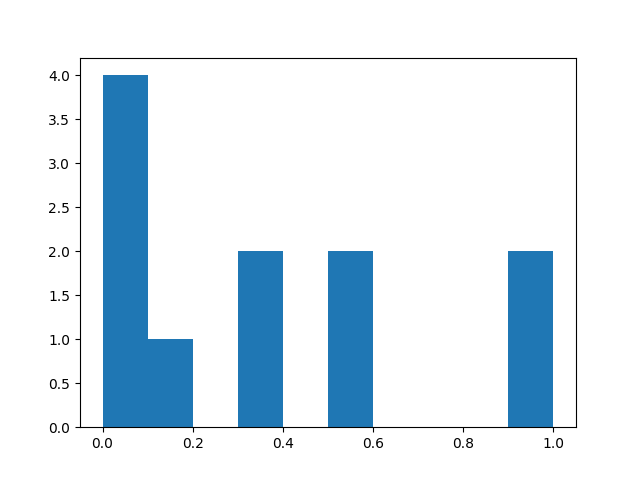

In [84]:
from scipy.stats import t
n, p = X_train.shape
residual = y_train - X_train @ beta_hat


sigma_squared = (residual.T @ residual) / (n - p)
var_beta_hat = sigma_squared * np.linalg.inv(X_train.T @ X_train)
se_beta = np.sqrt(np.diag(var_beta_hat))

t_stats = beta_hat.flatten() / se_beta

p_values = 2 * (1 - t.cdf(np.abs(t_stats), df = n - p))
print(p_values)

plt.close()
plt.hist(p_values)
plt.show()